In [2]:
import os
import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from utils_jgm.tikz_pgf_helpers import tpl_save


In [3]:
results_dir_unt = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
results_dir = '/depot/jgmakin/data/auditory_cortex/saved_results/cross_validated_correlations'
pretrained_correlations_file = 'c_w2l_correlations.csv'
untrained_correlations_file = 'correlations_w2l_untrained.csv'
std_error_file = 'std_error_cc.csv'


In [4]:
file_path = os.path.join(results_dir, pretrained_correlations_file)
data = pd.read_csv(file_path)
sessions = data['session'].unique()
data['normalized_cc'] = data['test_cc_raw']/data['normalizer']

In [4]:
sess = 200206
bin_width = 20
delay = 0
select_data = data[(data['bin_width']==bin_width) & (data['delay']==delay) & (data['session']==sess)]

In [6]:
ch = 32
select_data[select_data['channel'] == ch]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_cc
92144,200206.0,0.0,32.0,20.0,0.0,0.101304,0.068405,0.657779,500.0,0.103994
92208,200206.0,1.0,32.0,20.0,0.0,0.366176,0.336923,0.657779,500.0,0.512213
92272,200206.0,2.0,32.0,20.0,0.0,0.419911,0.386767,0.657779,500.0,0.587989
92336,200206.0,3.0,32.0,20.0,0.0,0.519817,0.499230,0.657779,500.0,0.758963
92400,200206.0,4.0,32.0,20.0,0.0,0.560162,0.540541,0.657779,500.0,0.821768
92464,200206.0,5.0,32.0,20.0,0.0,0.619625,0.605674,0.657779,500.0,0.920787
92528,200206.0,6.0,32.0,20.0,0.0,0.634788,0.618565,0.657779,500.0,0.940384
92592,200206.0,7.0,32.0,20.0,0.0,0.621819,0.607661,0.657779,500.0,0.923807
92656,200206.0,8.0,32.0,20.0,0.0,0.565160,0.551042,0.657779,500.0,0.837732
92720,200206.0,9.0,32.0,20.0,0.0,0.559306,0.541487,0.657779,500.0,0.823205


In [18]:
def get_selected_data(df, sess = 200206, bin_width = 20, delay = 0):
    selected_data = df[(df['bin_width']==bin_width) & (df['delay']==delay) & (df['session']==sess)]
    return selected_data

### Comparing the de-mean vs std results...!

In [36]:
wo_mean_file = 'demain_corr.csv'
file_path = os.path.join(results_dir, wo_mean_file)
data_wo_mean = pd.read_csv(file_path)

file_path = os.path.join(results_dir, pretrained_correlations_file)
data = pd.read_csv(file_path)

In [37]:
s_data = get_selected_data(data_wo_mean)
select_data = get_selected_data(data)

Text(0.5, 1.0, 'Corr with/without removing trials mean, ch-62')

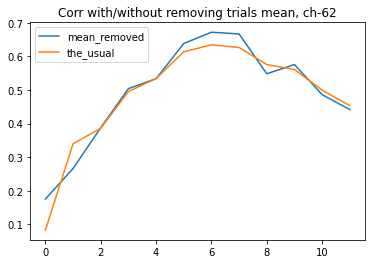

In [42]:
ch = 62
data_wo_mean = s_data[s_data['channel'] == ch]
data_w_mean = select_data[select_data['channel'] == ch]
plt.plot(data_wo_mean['layer'], data_wo_mean['test_cc_raw'], label='mean_removed')
plt.plot(data_w_mean['layer'], data_w_mean['test_cc_raw'], label='the_usual')
plt.legend(loc='best')
plt.title(f"Corr with/without removing trials mean, ch-{ch}")

Text(0.5, 1.0, 'Corr with/without removing trials mean, ch-32')

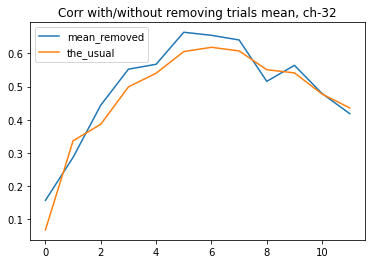

In [43]:
ch = 32
data_wo_mean = s_data[s_data['channel'] == ch]
data_w_mean = select_data[select_data['channel'] == ch]
plt.plot(data_wo_mean['layer'], data_wo_mean['test_cc_raw'], label='mean_removed')
plt.plot(data_w_mean['layer'], data_w_mean['test_cc_raw'], label='the_usual')
plt.legend(loc='best')
plt.title(f"Corr with/without removing trials mean, ch-{ch}")

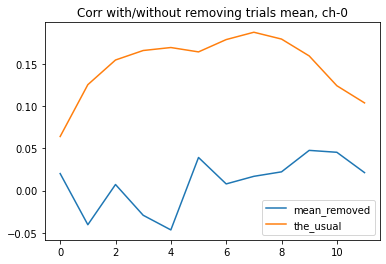

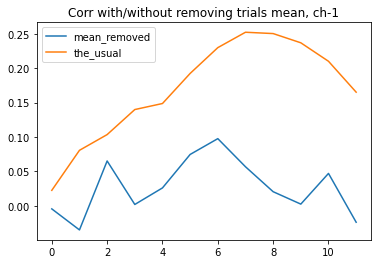

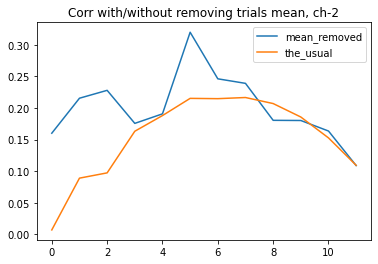

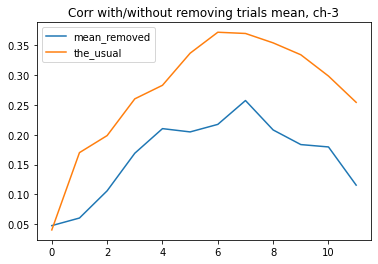

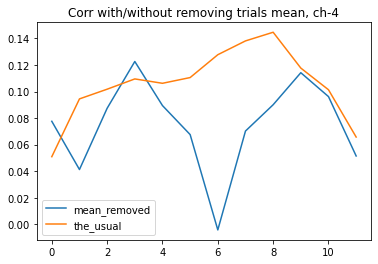

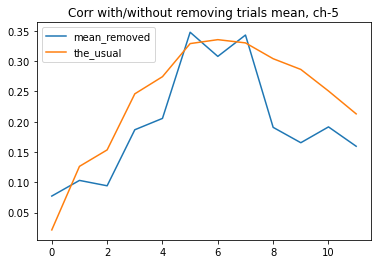

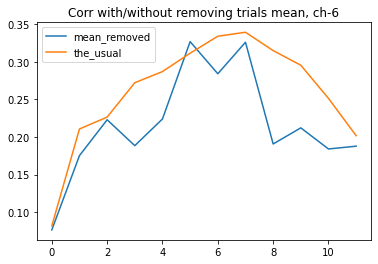

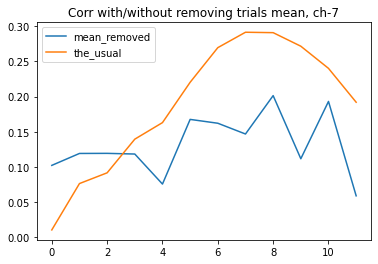

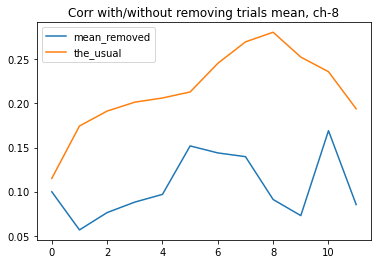

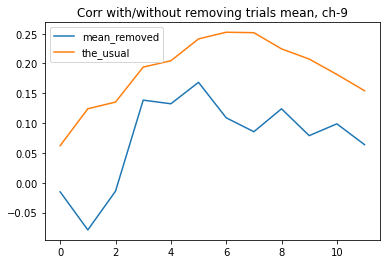

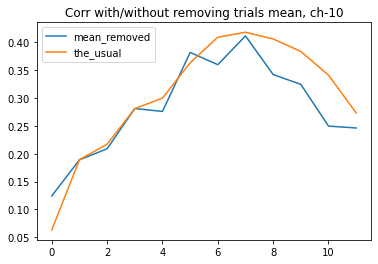

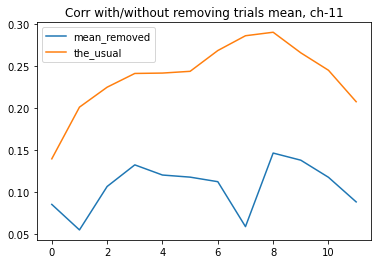

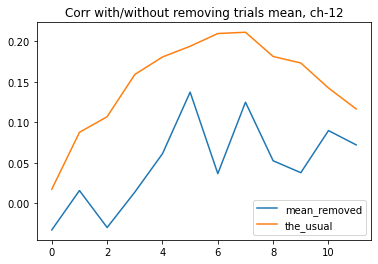

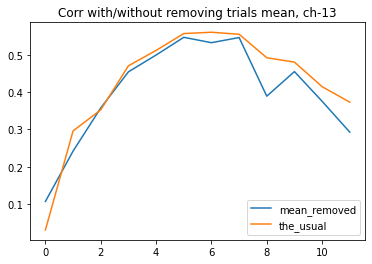

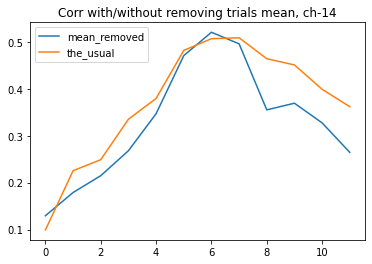

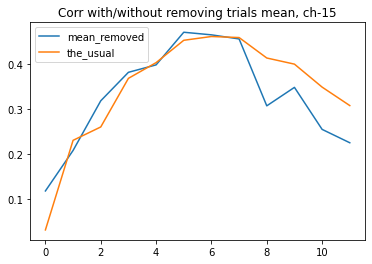

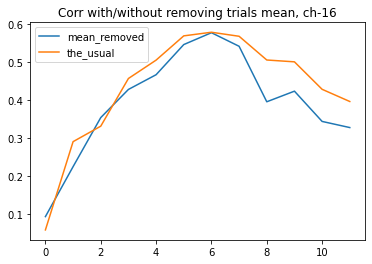

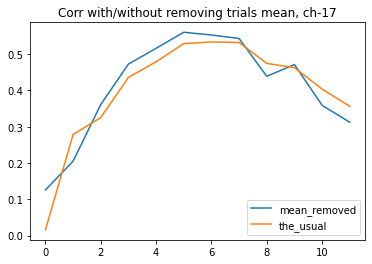

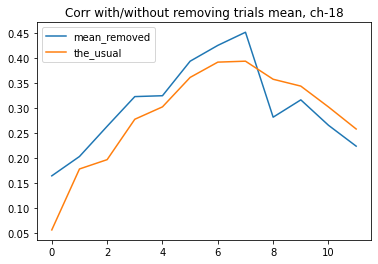

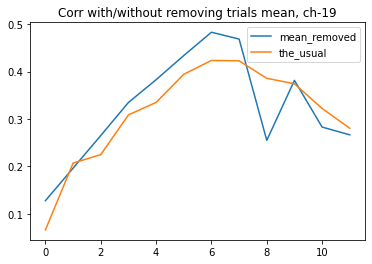

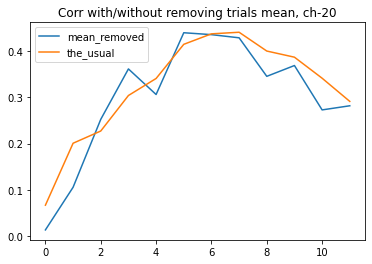

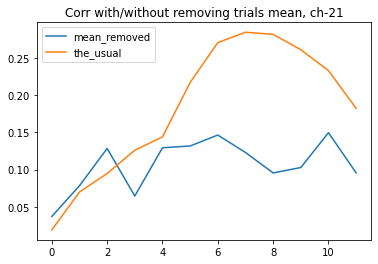

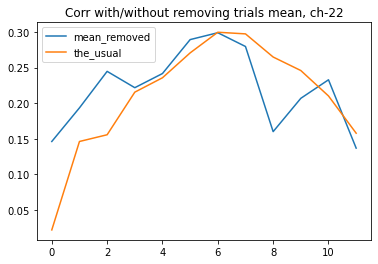

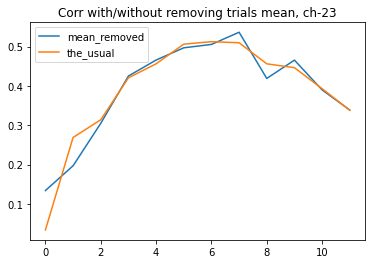

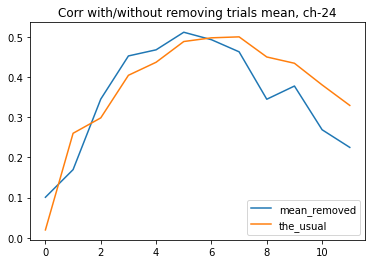

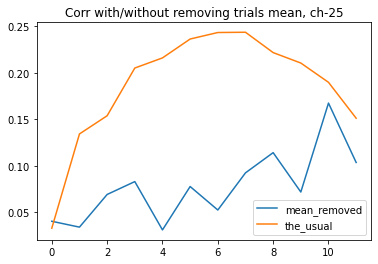

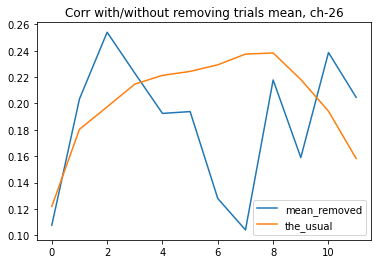

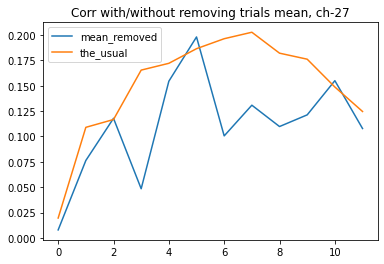

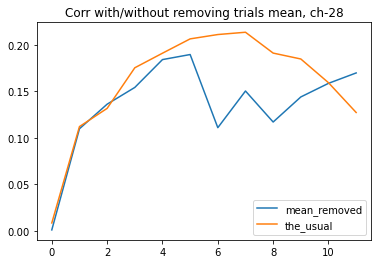

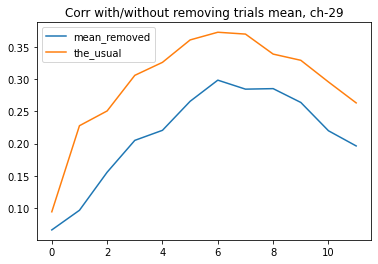

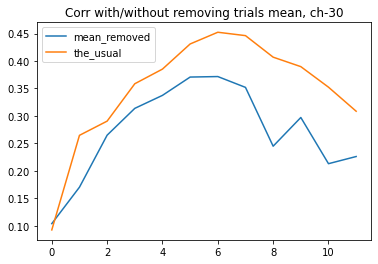

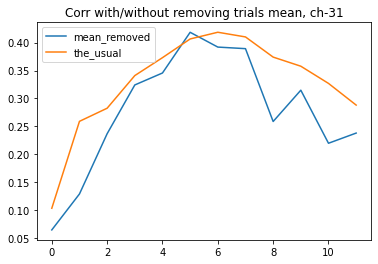

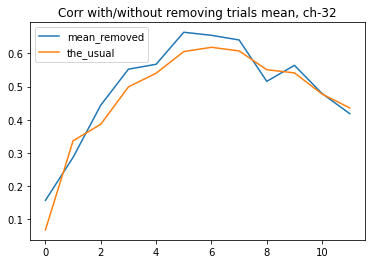

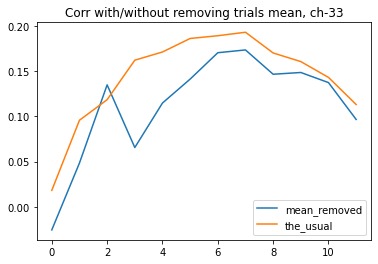

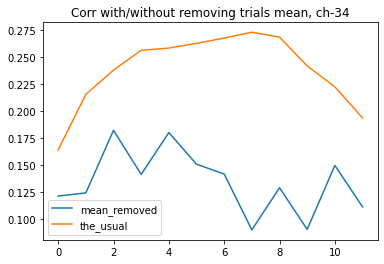

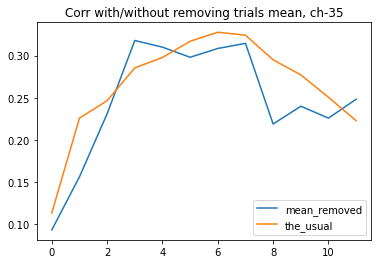

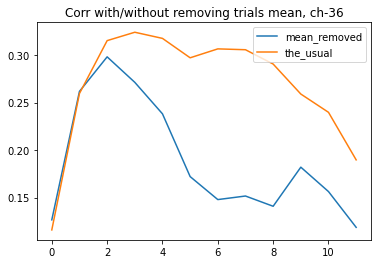

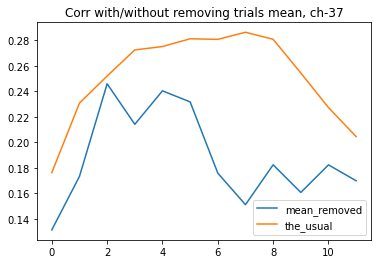

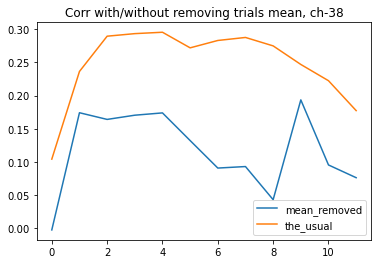

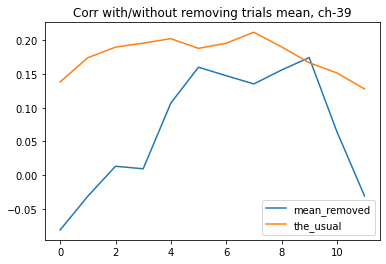

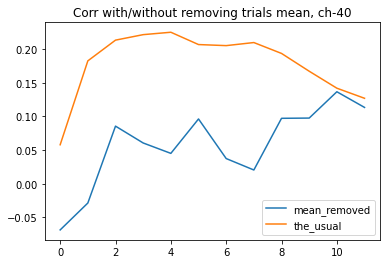

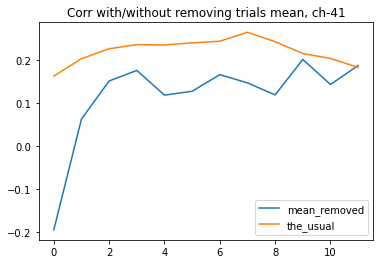

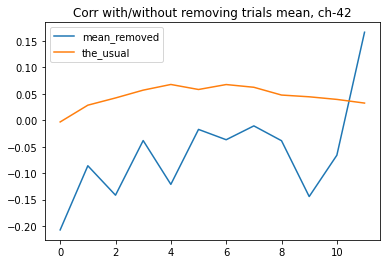

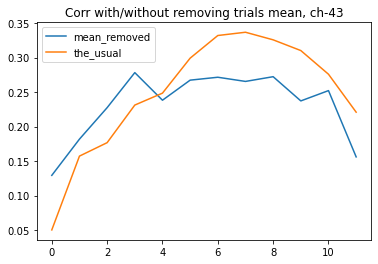

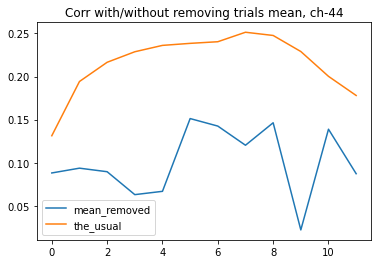

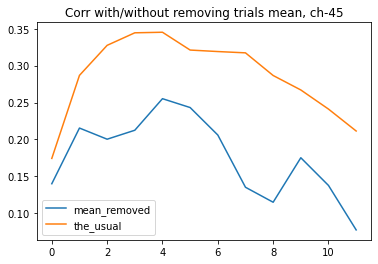

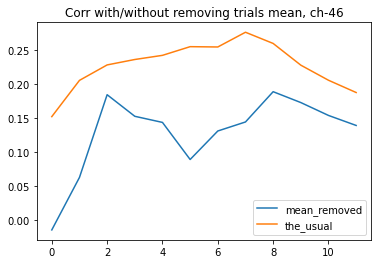

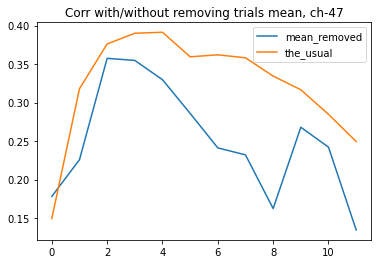

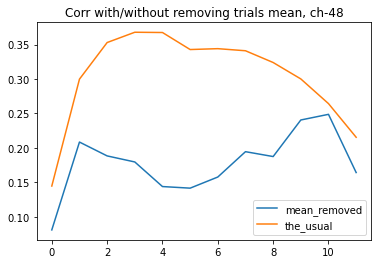

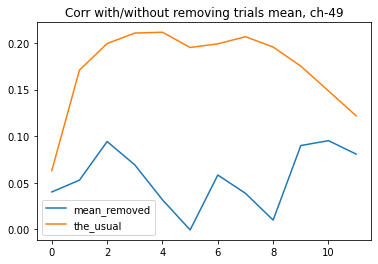

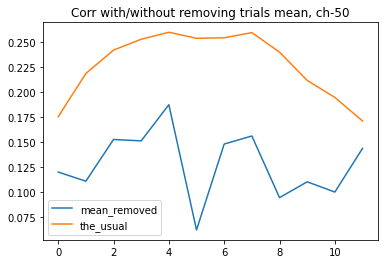

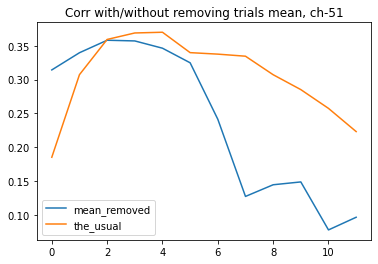

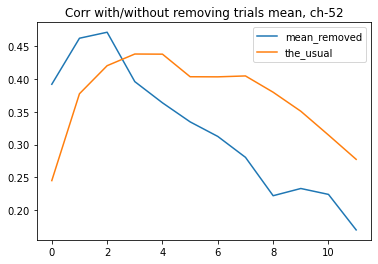

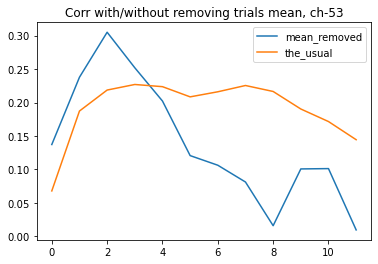

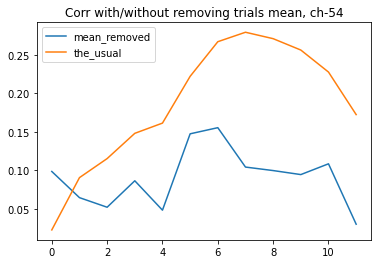

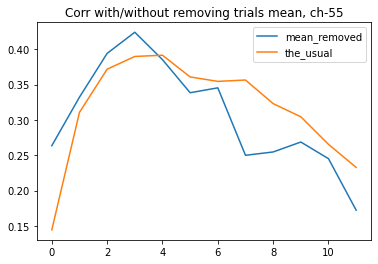

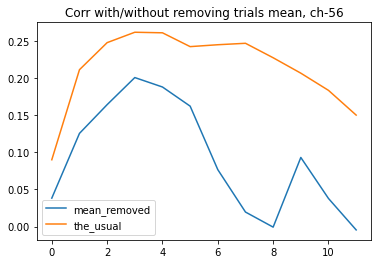

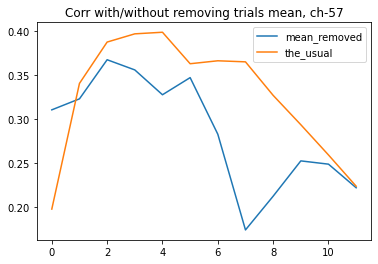

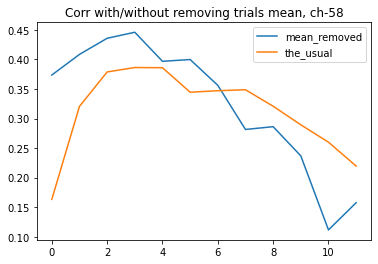

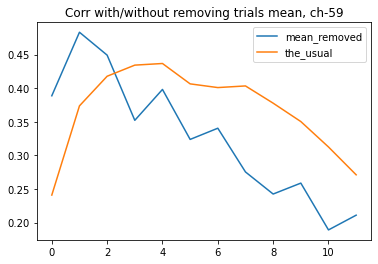

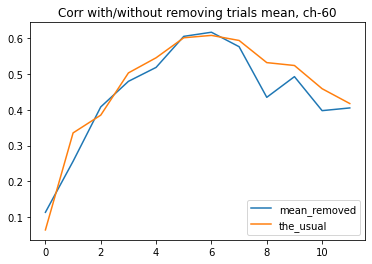

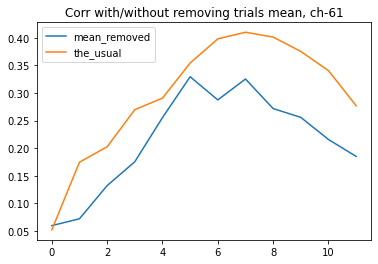

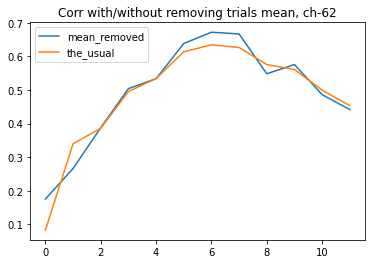

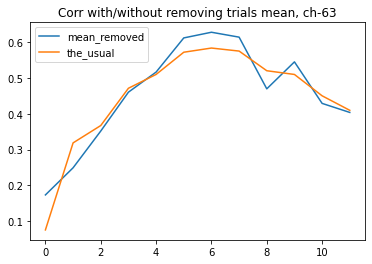

In [46]:
channels = np.arange(64)
for ch in channels:
#     ch = 62
    data_wo_mean = s_data[s_data['channel'] == ch]
    data_w_mean = select_data[select_data['channel'] == ch]
    plt.plot(data_wo_mean['layer'], data_wo_mean['test_cc_raw'], label='mean_removed')
    plt.plot(data_w_mean['layer'], data_w_mean['test_cc_raw'], label='the_usual')
    plt.legend(loc='best')
    plt.title(f"Corr with/without removing trials mean, ch-{ch}")
    plt.show()

In [34]:
data_wo_mean

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_cc
92144,200206.0,0.0,32.0,20.0,0.0,0.101304,0.068405,0.657779,500.0,0.103994
92208,200206.0,1.0,32.0,20.0,0.0,0.366176,0.336923,0.657779,500.0,0.512213
92272,200206.0,2.0,32.0,20.0,0.0,0.419911,0.386767,0.657779,500.0,0.587989
92336,200206.0,3.0,32.0,20.0,0.0,0.519817,0.499230,0.657779,500.0,0.758963
92400,200206.0,4.0,32.0,20.0,0.0,0.560162,0.540541,0.657779,500.0,0.821768
92464,200206.0,5.0,32.0,20.0,0.0,0.619625,0.605674,0.657779,500.0,0.920787
92528,200206.0,6.0,32.0,20.0,0.0,0.634788,0.618565,0.657779,500.0,0.940384
92592,200206.0,7.0,32.0,20.0,0.0,0.621819,0.607661,0.657779,500.0,0.923807
92656,200206.0,8.0,32.0,20.0,0.0,0.565160,0.551042,0.657779,500.0,0.837732
92720,200206.0,9.0,32.0,20.0,0.0,0.559306,0.541487,0.657779,500.0,0.823205


In [35]:
data_w_mean

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_cc
92144,200206.0,0.0,32.0,20.0,0.0,0.101304,0.068405,0.657779,500.0,0.103994
92208,200206.0,1.0,32.0,20.0,0.0,0.366176,0.336923,0.657779,500.0,0.512213
92272,200206.0,2.0,32.0,20.0,0.0,0.419911,0.386767,0.657779,500.0,0.587989
92336,200206.0,3.0,32.0,20.0,0.0,0.519817,0.499230,0.657779,500.0,0.758963
92400,200206.0,4.0,32.0,20.0,0.0,0.560162,0.540541,0.657779,500.0,0.821768
92464,200206.0,5.0,32.0,20.0,0.0,0.619625,0.605674,0.657779,500.0,0.920787
92528,200206.0,6.0,32.0,20.0,0.0,0.634788,0.618565,0.657779,500.0,0.940384
92592,200206.0,7.0,32.0,20.0,0.0,0.621819,0.607661,0.657779,500.0,0.923807
92656,200206.0,8.0,32.0,20.0,0.0,0.565160,0.551042,0.657779,500.0,0.837732
92720,200206.0,9.0,32.0,20.0,0.0,0.559306,0.541487,0.657779,500.0,0.823205


### using sents with repeats only..!

In [3]:
corr_with_repeated_sents_only = 'w2l_corr_repeated_sents_itr.csv'
corr_with_repeated_sents_only = 'w2l_corr_repeated_sents.csv'

In [4]:
file_path = os.path.join(results_dir, corr_with_repeated_sents_only)
data = pd.read_csv(file_path)
sessions = data['session'].unique()
data['normalized_cc'] = data['test_cc_raw']/data['normalizer']

In [6]:
sess = 200206
bin_width = 20
delay = 0
select_data = data[(data['bin_width']==bin_width) & (data['delay']==delay) & (data['session']==sess)]

In [9]:
ch = 62
select_data[(select_data['channel']==ch)] 

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_cc
62,200206.0,0.0,62.0,20.0,0.0,0.177525,0.049987,0.538836,10.0,0.092768
126,200206.0,1.0,62.0,20.0,0.0,0.358520,0.112421,0.538836,10.0,0.208637
190,200206.0,2.0,62.0,20.0,0.0,0.496599,0.312858,0.538836,10.0,0.580618
254,200206.0,3.0,62.0,20.0,0.0,0.683566,0.338429,0.538836,10.0,0.628074
318,200206.0,4.0,62.0,20.0,0.0,0.748558,0.353813,0.538836,10.0,0.656623
382,200206.0,5.0,62.0,20.0,0.0,0.767949,0.568144,0.538836,10.0,1.054390
446,200206.0,6.0,62.0,20.0,0.0,0.782127,0.531950,0.538836,10.0,0.987219
510,200206.0,7.0,62.0,20.0,0.0,0.800099,0.570944,0.538836,10.0,1.059586
574,200206.0,8.0,62.0,20.0,0.0,0.746887,0.482834,0.538836,10.0,0.896067
638,200206.0,9.0,62.0,20.0,0.0,0.764673,0.493033,0.538836,10.0,0.914997


In [29]:
print(f"normalized_corr above 1: {100* np.sum(select_data['normalized_cc'] > 1) / select_data.shape[0]:.2f} %")

normalized_corr above 1: 7.42 %


In [30]:
select_data.shape

(768, 10)

#### only repeats, median out of 5 itr's...

In [17]:
corr_with_repeated_sents_only = 'w2l_corr_repeated_sents_itr.csv'
file_path = os.path.join(results_dir, corr_with_repeated_sents_only)
med_data = pd.read_csv(file_path)
med_data['normalized_cc'] = med_data['test_cc_raw']/med_data['normalizer']

In [18]:
med_data[(med_data['channel']==ch)]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_cc
62,200206.0,0.0,62.0,20.0,0.0,0.184275,0.057175,0.551003,10.0,0.103766
126,200206.0,1.0,62.0,20.0,0.0,0.400556,0.184329,0.551003,10.0,0.334534
190,200206.0,2.0,62.0,20.0,0.0,0.538516,0.364080,0.551003,10.0,0.660759
254,200206.0,3.0,62.0,20.0,0.0,0.685909,0.489521,0.551003,10.0,0.888419
318,200206.0,4.0,62.0,20.0,0.0,0.745037,0.550950,0.551003,10.0,0.999904
382,200206.0,5.0,62.0,20.0,0.0,0.783142,0.603916,0.551003,10.0,1.096030
446,200206.0,6.0,62.0,20.0,0.0,0.815014,0.636448,0.551003,10.0,1.155072
510,200206.0,7.0,62.0,20.0,0.0,0.814473,0.642459,0.551003,10.0,1.165982
574,200206.0,8.0,62.0,20.0,0.0,0.772992,0.534450,0.551003,10.0,0.969959
638,200206.0,9.0,62.0,20.0,0.0,0.796267,0.539929,0.551003,10.0,0.979902


In [26]:
print(f"normalized_corr above 1: {100* np.sum(med_data['normalized_cc'] > 1) / med_data.shape[0]:.2f} %")

normalized_corr above 1: 9.11 %


##### baseline results..

In [10]:
file_path = os.path.join(results_dir, pretrained_correlations_file)
normal_data = pd.read_csv(file_path)
sessions = normal_data['session'].unique()
normal_data['normalized_cc'] = normal_data['test_cc_raw']/normal_data['normalizer']

In [11]:
sess = 200206
bin_width = 20
delay = 0
normal_select_data = normal_data[(normal_data['bin_width']==bin_width) & \
                                 (normal_data['delay']==delay) & (normal_data['session']==sess)]

In [13]:
normal_select_data[(normal_select_data['channel']==ch)] 

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_cc
92174,200206.0,0.0,62.0,20.0,0.0,0.121564,0.083256,0.550849,500.0,0.151142
92238,200206.0,1.0,62.0,20.0,0.0,0.373253,0.339704,0.550849,500.0,0.616691
92302,200206.0,2.0,62.0,20.0,0.0,0.416914,0.386223,0.550849,500.0,0.701140
92366,200206.0,3.0,62.0,20.0,0.0,0.513631,0.495235,0.550849,500.0,0.899039
92430,200206.0,4.0,62.0,20.0,0.0,0.556254,0.533967,0.550849,500.0,0.969352
92494,200206.0,5.0,62.0,20.0,0.0,0.632111,0.613694,0.550849,500.0,1.114087
92558,200206.0,6.0,62.0,20.0,0.0,0.656144,0.634432,0.550849,500.0,1.151733
92622,200206.0,7.0,62.0,20.0,0.0,0.646794,0.626575,0.550849,500.0,1.137470
92686,200206.0,8.0,62.0,20.0,0.0,0.591344,0.575585,0.550849,500.0,1.044904
92750,200206.0,9.0,62.0,20.0,0.0,0.578065,0.561089,0.550849,500.0,1.018588


In [27]:
print(f"normalized_corr above 1: {100* np.sum(normal_select_data['normalized_cc'] > 1) / normal_select_data.shape[0]:.2f} %")

normalized_corr above 1: 24.48 %


### significant neurons

In [15]:
sess = 200206
bin_width = 20
delay = 0
select_data = data[(data['bin_width']==bin_width) & (data['delay']==delay) & (data['session']==sess)]

In [71]:
bin_width = 20
select_data = data[(data['bin_width'] == bin_width) & (data['delay'] == 0) & (data['layer'] == 6)]

In [72]:
sig_threshold = 0.08
significant = select_data[select_data['normalizer'] > sig_threshold]#.shape[0]#/select_data.shape[0]

In [77]:
significant[significant['test_cc_raw'] > sig_threshold].shape

(185, 10)

In [78]:
significant.shape

(241, 10)

In [76]:
select_data.shape

(1919, 10)

<AxesSubplot:xlabel='layer'>

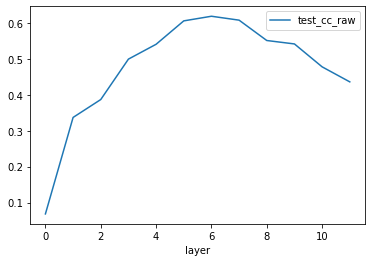

In [17]:
select_data[select_data['channel'] == 32].plot(x='layer', y='test_cc_raw')

<AxesSubplot:xlabel='layer'>

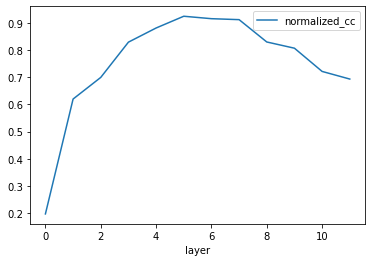

In [10]:
select_data[select_data['channel'] == 32].plot(x='layer', y='normalized_cc')

### Comparing the trained and random weights..

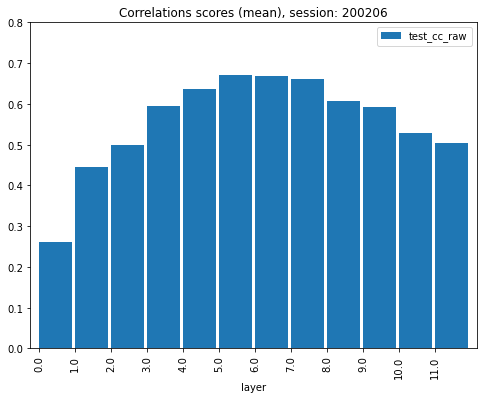

In [26]:
sess = 200206
bin_width = 40
delay = 0
select_data = data[(data['bin_width']==bin_width) & (data['delay']==delay)]
fig, ax = plt.subplots(figsize=(8,6))
select_data[(select_data['session']==sess) & (select_data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,0.8), width=0.9, align='center', title=sess, ax=ax)
plt.title(f"Correlations scores (mean), session: {sess}")
plt.savefig(f"./saved_results/correlation_scores_mean_vs_layers_session_{sess}.jpg")

### std_error 

In [81]:
file_path = os.path.join(results_dir, std_error_file)
data = pd.read_csv(file_path)#, delim_whitespace=True)

In [82]:
data['SE'] = np.sqrt(1 - data['test_cc_raw']**2)/np.sqrt(data['N_sents'] - 2)

In [83]:
data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,SE
0,200206.0,0.0,0.0,20.0,0.0,0.051405,0.019270,0.183260,10.0,0.353488
1,200206.0,0.0,1.0,20.0,0.0,0.242744,-0.090024,0.221996,10.0,0.352118
2,200206.0,0.0,2.0,20.0,0.0,0.282421,-0.102210,0.139223,10.0,0.351702
3,200206.0,0.0,3.0,20.0,0.0,0.088929,-0.035392,0.421509,10.0,0.353332
4,200206.0,0.0,4.0,20.0,0.0,0.190587,-0.090784,0.117899,10.0,0.352093
...,...,...,...,...,...,...,...,...,...,...
76027,200206.0,11.0,59.0,20.0,0.0,0.302685,0.278399,0.510224,500.0,0.043039
76028,200206.0,11.0,60.0,20.0,0.0,0.441852,0.422937,0.579529,500.0,0.040606
76029,200206.0,11.0,61.0,20.0,0.0,0.302439,0.299850,0.445747,500.0,0.042749
76030,200206.0,11.0,62.0,20.0,0.0,0.479417,0.461898,0.550849,500.0,0.039744


In [84]:
select_data = data[(data['layer']==6) & (data['channel']==32)]

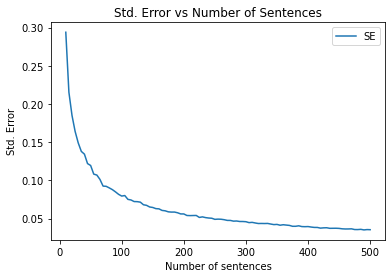

In [90]:
select_data.sort_values(by='N_sents').plot(x='N_sents', y = 'SE')
plt.xlabel("Number of sentences")
plt.ylabel("Std. Error")
plt.title("Std. Error vs Number of Sentences")
extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=f"./saved_results/tikz_files/std-error-vs-sents.tex",
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    pre_tikzpicture_lines={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

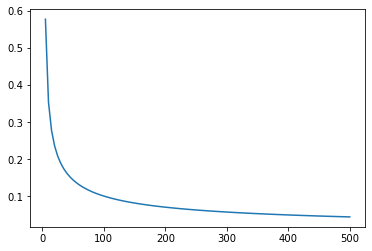

In [88]:
n = np.arange(5,501,5)
se = 1/np.sqrt(n-2)
plt.plot(n, se)

<AxesSubplot:xlabel='N_sents'>

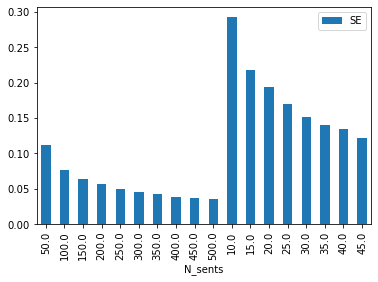

In [75]:
select_data.plot.bar(x='N_sents', y = 'SE')

In [66]:
select_data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents
416,200206.0,6.0,32.0,20.0,0.0,0.649937,0.627892,0.660122,50.0
1184,200206.0,6.0,32.0,20.0,0.0,0.658504,0.647764,0.660122,100.0
1952,200206.0,6.0,32.0,20.0,0.0,0.641911,0.637616,0.660122,150.0
2720,200206.0,6.0,32.0,20.0,0.0,0.648968,0.604254,0.660122,200.0
3488,200206.0,6.0,32.0,20.0,0.0,0.640066,0.636886,0.660122,250.0
4256,200206.0,6.0,32.0,20.0,0.0,0.647282,0.614852,0.660122,300.0
5024,200206.0,6.0,32.0,20.0,0.0,0.637507,0.612728,0.660122,350.0
5792,200206.0,6.0,32.0,20.0,0.0,0.626982,0.627785,0.660122,400.0
6560,200206.0,6.0,32.0,20.0,0.0,0.632874,0.626935,0.660122,450.0
7328,200206.0,6.0,32.0,20.0,0.0,0.634891,0.620247,0.660122,500.0


### Untrained model correlations...!

In [44]:
file_path = os.path.join(results_dir, untrained_correlations_file)
data = pd.read_csv(file_path)#, delim_whitespace=True)


In [46]:
data['N_sents'].unique()

array([500.,  50., 100., 150., 200., 250., 300., 350., 400., 450.])

In [47]:
select_data = data[(data['layer']==6) & (data['channel']==32)]

<AxesSubplot:xlabel='N_sents'>

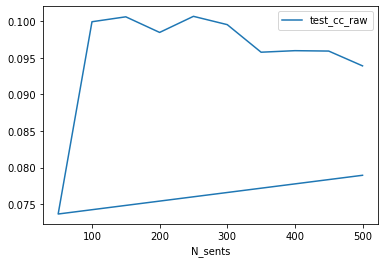

In [49]:
select_data.plot(x='N_sents', y='test_cc_raw')

Text(0.5, 1.0, 'Correlations for untrained model...')

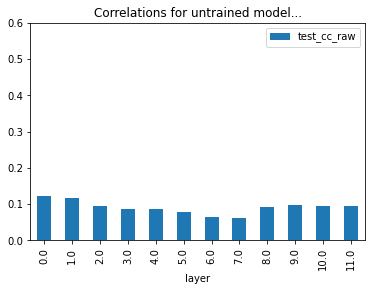

In [17]:
data.groupby(['layer'], as_index=False).mean().plot.bar(x='layer', y='test_cc_raw')
plt.ylim([0, 0.6])
plt.title("Correlations for untrained model...")

In [ ]:
sess = 200206
bin_width = 40
delay = 0
select_data = data[(data['bin_width']==bin_width) & (data['delay']==delay)]
fig, ax = plt.subplots(figsize=(8,6))
select_data[(select_data['session']==sess) & (select_data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,0.8), width=0.9, align='center', title=sess, ax=ax)
plt.title(f"Correlations scores (mean), session: {sess}")
plt.savefig(f"./saved_results/correlation_scores_mean_vs_layers_session_{sess}.jpg")

In [10]:
file_path

'/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations/correlations_w2l_untrained.csv'

In [ ]:
sessions = data['session'].unique()
data['normalized_cc'] = data['test_cc_raw']/data['normalizer']

sess = 200206
bin_width = 40
delay = 0
select_data = data[(data['bin_width']==bin_width) & (data['delay']==delay)]

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sess = 200206
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).mean()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,0.6), width=0.9, align='center', title=sess, ax=ax)
plt.title(f"Correlations scores (mean), session: {sess}")
plt.savefig(f"./saved_results/correlation_scores_mean_vs_layers_session_{sess}.jpg")

In [42]:
data['norm_capped_cc'] = data['normalized_cc']
data['norm_capped_cc'][data['norm_capped_cc'] > 1] = 1

In [3]:
data['session'].unique().size

45

In [3]:
data.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,normalized_cc
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541,2.141444
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085,1.322590
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035,1.950964
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557,1.064028
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368,1.954458


In [6]:
data.size

829008

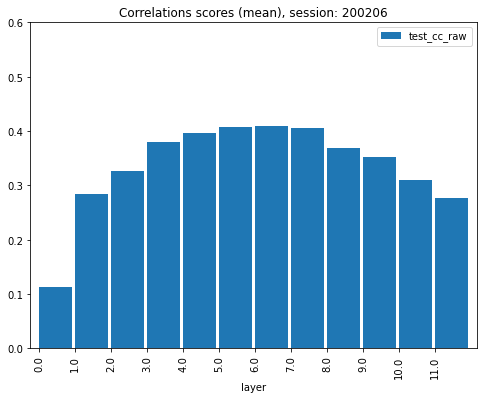

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
sess = 200206
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).mean()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,0.6), width=0.9, align='center', title=sess, ax=ax)
plt.title(f"Correlations scores (mean), session: {sess}")
plt.savefig(f"./saved_results/correlation_scores_mean_vs_layers_session_{sess}.jpg")

In [5]:
data[(data['session']==200206) & (data['layer']==5) & (data['channel']==62)]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer
8806,200206.0,5.0,62.0,40.0,0.0,0.682139,0.669589,0.593698


In [6]:
layers = np.random.randint(0,11,15)
scores = np.random.uniform(0,1,15)

### subject-wise sessions and coordinates

In [5]:
c_RH = np.array([190606, 190604, 190726, 190801, 180725, 180720, 180731,
                 180807, 180622, 190703, 190607, 190605, 180728, 180619, 180502])
b_RH = np.array([180405, 180501, 180719, 180808, 180627, 180814, 180810,
                 180801, 180417, 180413, 180420, 180613, 180724, 180730, 180717, 180406])
f_RH = np.array([191209, 200226, 200325, 200213, 200313, 191211, 200323,
                200312, 200219, 200401, 200318])
c_LH = np.array([200207, 191212, 191206, 200206, 191125, 200610, 191113,
                 191002, 191115, 200205, 191219, 200617, 200212, 191121, 191210])
# sessions 200610, 200617 not found in box 
monkey_sessions = {'c-RH': c_RH, 'b-RH': b_RH, 'f-RH': f_RH, 'c-LH': c_LH, 'reversed-LH':c_LH}


coordinates_c_RH = np.array([[-0.4,1.4],[-0.75,1.25],[-0.94,1.35],[-0.92,1.3],
                            [-1.01,1.08],[-0.5,1.15],[-0.3,1.08],[0.18,0.8],
                            [0.01,0.03],[-0.32,0.01],[1.1,-0.8],[0.8,-0.85],
                            [0.6,-0.75],[0.35,-0.9],[0.25,-0.8]])
coordinates_b_RH = np.array([[-0.98,1.2],[-0.65,1.05],[-0.3,1.25],[-1.15,1.15],
                            [-0.8,0.98],[-0.7,0.55],[-0.55,0.3],[-1.25,0.2],
                            [0.07,0.05],[0.4,-0.4],[-0.6,-0.65],[-0.7,-0.7],
                            [-0.95,-1.2],[0.15,-0.98],[0.02,-1.1],[0.9,-0.96]])
coordinates_f_RH = np.array([[-0.55,0.98],[-0.7,0.7],[0.7,0.6],[0,0.25],
                            [-0.8,0.03],[1.02,-0.08],[0.55,-0.5],[-1.02,-0.6],
                            [-0.85,-0.8],[-0.85,-1.08],[-0.05,-1.3]])
coordinates_c_LH = np.array([[0,1.2],[-0.6,0.7],[0.92,0.95],[0.92,0.60],
                            [0.5,0.5],[1.08,0.2],[0.5,0.02],[-0.09,-0.07],
                            [-0.09,-0.5],[0.5,-0.5],[0.92,-0.8],[1.01,-1],
                            [0.43,-1.2],[-0.07,-0.95],[-0.8,-1.3]])
reversed_c_LH = np.zeros((15,2))
reversed_c_LH[:,0] = coordinates_c_LH[:,0]*(-1)
reversed_c_LH[:,1] = coordinates_c_LH[:,1]

monkey_coordinates = {'c-RH': coordinates_c_RH, 'b-RH': coordinates_b_RH,
                       'f-RH': coordinates_f_RH, 'c-LH': coordinates_c_LH,  'reversed-LH':reversed_c_LH}
subjects = ['c-RH', 'b-RH', 'f-RH', 'c-LH', 'reversed-LH']

### Plotting functions

In [27]:
def plot_on_coordinates(coordinates, max_layers, max_scores, title, ax, fontsize):
    circle = plt.Circle((0,0),2, fill=False)
    ax.set_aspect(1)
    ax.add_artist(circle)
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2.5,2.5])
    ax.set_title(title, fontsize=fontsize)
    scatt = ax.scatter(coordinates[:,0],coordinates[:,1], c=max_layers, s=max_scores*500 ,cmap='magma', vmin=0, vmax=11)
    # plotting black rings over dots
    sizes = 500*np.ones(coordinates.shape[0])
    ax.scatter(coordinates[:,0], coordinates[:,1],
            s = sizes, facecolor='none', edgecolor='black')
    plt.grid(True)
    # cax = plt.axes([0.85, 0.2, 0.05, 0.6])
    plt.colorbar(scatt, ax=ax, label='layers')
    ax.set_xlabel('caudal - rostral', fontsize=fontsize)
    ax.set_ylabel('ventral - dorsal', fontsize=fontsize)
    
def plot_sessions(data, m_sessions, coordinates, monkey='c, LH', normalize=False,fontsize=20):
    sessions = data['session'].unique()
    
    c_sessions = m_sessions[np.isin(m_sessions,sessions, invert=False)]
    c_coordinates = coordinates[np.isin(m_sessions,sessions, invert=False),:]
    max_layers = np.zeros(c_sessions.size)
    max_scores = np.zeros(c_sessions.size)
    discarded_sessions = []

    if normalize:
        column = 'normalized_cc'
        monkey = monkey+'_normalized'
#         filename = f"Topographic_bar_plots_{monkey}_normalized.jpg"
    else:
        column = 'test_cc_raw'
#         filename = f"Topographic_bar_plots_{monkey}.jpg"
    
    
    for i,sess in enumerate(c_sessions):
            valid_df = data[(data['session']==sess) & (data['normalizer']>0.1)]
            if valid_df.empty:
                #print(f"index: {i}, sess: {sess} is empty...!")
                discarded_sessions.append(i)
            else:
                idx = valid_df.idxmax()[column]
                max_layers[i] = data.iloc[idx]['layer']
                max_scores[i] = data.iloc[idx][column]

    valid_sessions = np.delete(c_sessions, discarded_sessions)
    valid_coordinates = np.delete(c_coordinates, discarded_sessions, axis=0)
    max_layers = np.delete(max_layers, discarded_sessions)
    max_scores = np.delete(max_scores, discarded_sessions)
    print(max_scores)
    print(f"{len(discarded_sessions)} were insignificant and hence discarded..!")
    fig, axes = plt.subplots(figsize=(10,6))
    plot_on_coordinates(valid_coordinates, max_layers, max_scores,f"Monkey, {monkey}", axes, fontsize=fontsize)


def topographic_bar_plots(data, m_sessions, coordinates, monkey='c_LH', cmap='magma', size=10, fontsize=14,
                          save_file=False, normalize=False, separate_color_map=True, capped=True):
    delays = data['delay'].unique()
    fig, axes = plt.subplots(figsize=(size,size))
    plt.grid(True)
    circle = plt.Circle((0,0),2, fill=False)
    axes.set_aspect(1)
    axes.add_artist(circle)
    axes.set_xlim([-2.0,2.0])
    axes.set_ylim([-2.0,2.0])
    axes.set_title(f"Monkey, {monkey}")
    vmin=0
    if normalize:
        column = 'normalized_cc'
        filename = f"Topographic_bar_plots_{monkey}_normalized"
        title = f"Monkey, {monkey}_normalized"
        
        if capped:
            column = 'norm_capped_cc'
            title = title+' (capped)'
            filename = f"Topographic_bar_plots_{monkey}_normalized_capped"
        vmax = 1
    else:
        column = 'test_cc_raw'
        filename = f"Topographic_bar_plots_{monkey}_delay_{delays}"
        title = f"Monkey, {monkey}_delay_{delays}"
        vmax = data.groupby('session', as_index=False).mean().max()[column]
        vmax = min(vmax, 1) 
    axes.set_title(title, fontsize=fontsize)
    axes.set_xlabel('caudal - rostral', fontsize=fontsize)
    axes.set_ylabel('ventral - dorsal', fontsize=fontsize)
    sessions = data['session'].unique()
    sessions = m_sessions[np.isin(m_sessions,sessions, invert=False)]
    coordinates = coordinates[np.isin(m_sessions,sessions, invert=False),:]
    discarded_sessions = []
    
    for i,sess in enumerate(sessions):
            valid_df = data[(data['session']==sess) & (data['normalizer']>0.1)]
#             print(valid_df.max()[column], end=': ')
            if valid_df.empty:
#                 print(f"index: {i}, sess: {sess} is empty...!")
                discarded_sessions.append(i)
                
            else:
                
                cx = (coordinates[i][0] + 2)/4 - 0.1
                cy = (coordinates[i][1] + 2)/4 - 0.025
                ax = plt.axes([cx, cy, 0.2, 0.05])
                l_scores = valid_df.groupby('layer', as_index=False).mean()[column]
                if separate_color_map:
                    image = ax.imshow(np.atleast_2d(l_scores), extent=(0,12,0,4), cmap=cmap)#, vmin=vmin, vmax=vmax)
                else:
                    image = ax.imshow(np.atleast_2d(l_scores), extent=(0,12,0,4), cmap=cmap, vmin=vmin, vmax=vmax)
                ax.set_yticks([])
                ax.set_title(sess)
    if not separate_color_map:
        ax = plt.axes([0.92, 0.2, 0.035, 0.6])
        plt.colorbar(image, cax = ax, ax = axes, label='layers')
    print(f"{len(discarded_sessions)} were insignificant and hence discarded..!")
    if save_file:
        plt.savefig(os.path.join("./saved_results", 'svg_files',f"{filename}.svg"))
    return discarded_sessions

### Topographic plots

In [20]:
subjects = ['c-RH', 'b-RH', 'f-RH', 'c-LH', 'reversed-LH'] 
norm = False

3 were insignificant and hence discarded..!


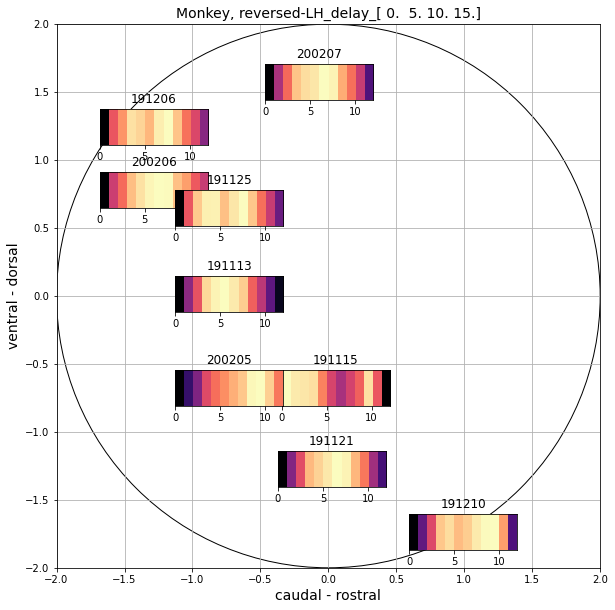

In [21]:
s = 4

discarded_sessions = topographic_bar_plots(data,
                                           monkey_sessions[subjects[s]],
                                           monkey_coordinates[subjects[s]],
                                           monkey=subjects[s],
                                           cmap='magma',
                                           size=10,
                                           separate_color_map=True,
                                          save_file=False,
                                          normalize=False,
                                          capped=False)

### Plotting the peaks 

In [12]:
# sessions = select_data['session'].unique()
# for s in sessions:
#     current_sess = select_data[select_data['session']==s]
#     idx = current_sess.idxmax()['test_cc_raw']
    
#     print(current_sess.iloc[idx])
select_data[select_data['session']==200207]

NameError: name 'select_data' is not defined

[0.26855867 0.19977191 0.38819808 0.18277139 0.27994969 0.03777827
 0.12940852 0.21911403 0.06314841]
0 were insignificant and hence discarded..!


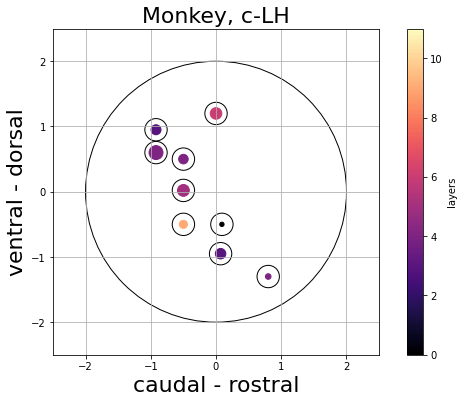

In [29]:
bin_width = 40
delay = 0
# valid_df = data[(data['session']==sess) & (data['normalizer']>0.1)]
select_data = data[(data['bin_width']==bin_width) & (data['delay']==delay)& (data['normalizer']>0.1)].\
                groupby(['layer','session'], as_index=False).median()
s = 3
normalize = False
monkey = subjects[s]
plot_sessions(select_data, monkey_sessions[subjects[s]], monkey_coordinates[subjects[4]], monkey=subjects[s], normalize=normalize, fontsize=22)
if normalize:
    monkey = monkey + '-normalized'

# plt.savefig(f"./saved_results/svg_files/Topographical_peaks_{monkey}.svg")
# plt.scatter(x=2, y = 2.2, s = 500, facecolor='w', marker='o', edgecolor='black', linewidth=2)
# ax = plt.gca()
# ax.annotate('corr=1.0', xy=(1.8, 2.2), xytext=(0, 2.2),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# plt.savefig(f"./saved_results/Topographical_peaks_{monkey}.jpg")
# plt.legend(['correlation = 1'])
# plt.show()
# export the figure to tikz



extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=f"./saved_results/tikz_files/Topographical-peaks-{monkey}.tex",
    extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
    pre_tikzpicture_lines={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

3 were insignificant and hence discarded..!


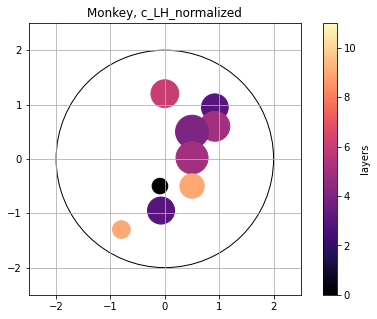

In [150]:
normalize = True
monkey = 'c_LH'
if normalize:
    monkey = monkey + '_normalized'
plot_sessions(data, c_LH, coordinates_c_LH, monkey='c_LH', normalize=normalize)

plt.savefig(f"./saved_results/Topographical_peaks_{monkey}.jpg")

9 were insignificant and hence discarded..!


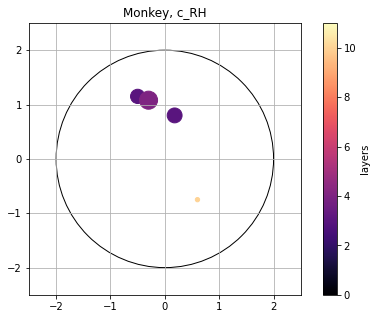

In [151]:
normalize = False
monkey = 'c_RH'
if normalize:
    monkey = monkey + '_normalized'
plot_sessions(data,c_RH, coordinates_c_RH, monkey='c_RH')
plt.savefig(f"./saved_results/Topographical_peaks_{monkey}.jpg")

9 were insignificant and hence discarded..!


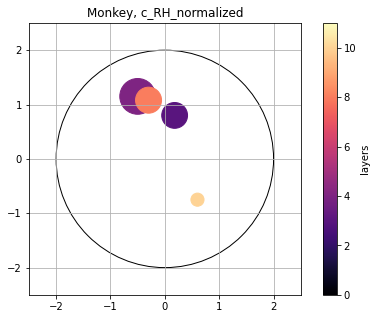

In [152]:
normalize = True
monkey = 'c_RH'
if normalize:
    monkey = monkey + '_normalized'
plot_sessions(data,c_RH, coordinates_c_RH, monkey='c_RH', normalize=True)
plt.savefig(f"./saved_results/Topographical_peaks_{monkey}.jpg")

8 were insignificant and hence discarded..!


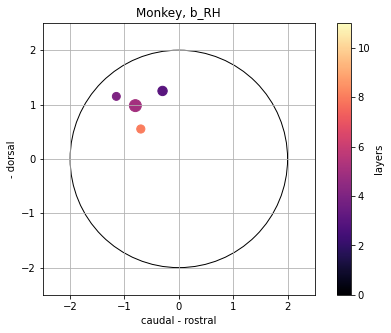

In [287]:
normalize = False
monkey = 'b_RH'
if normalize:
    monkey = monkey + '_normalized'
plot_sessions(data,b_RH, coordinates_b_RH, monkey='b_RH', normalize=normalize)
plt.savefig(f"./saved_results/Topographical_peaks_{monkey}.jpg")

4 were insignificant and hence discarded..!


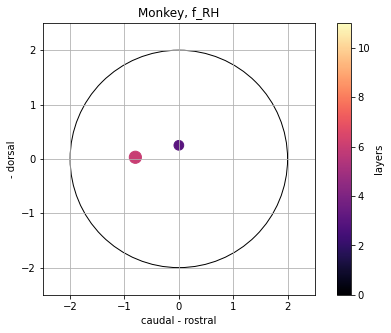

In [289]:
normalize = False
monkey = 'f_RH'
if normalize:
    monkey = monkey + '_normalized'
plot_sessions(data,f_RH, coordinates_f_RH, monkey='f_RH', normalize=normalize)
plt.savefig(f"./saved_results/Topographical_peaks_{monkey}.jpg")

#### Testing...!

### Plotting all sessions combined...!

In [14]:
# coordinates_c_LH[:,0] = coordinates_c_LH[:,0]*-1

# monkey_coordinates = {'c_RH': coordinates_c_RH, 'b_RH': coordinates_b_RH,
#                        'f_RH': coordinates_f_RH, 'c_LH': coordinates_c_LH,  'reversed_LH':reversed_c_LH}
# monkey_sessions = {'c_RH': c_RH, 'b_RH': b_RH, 'f_RH': f_RH, 'c_LH': c_LH, 'reversed_LH':c_LH}
sessns = np.concatenate([c_RH, b_RH, f_RH, c_LH], axis=0)
coords = np.concatenate([coordinates_c_RH,coordinates_b_RH,coordinates_f_RH, reversed_c_LH ], axis=0)

In [42]:
delay = 0
bin_width = 40
select_data = data[(data['delay']==delay) & (data['bin_width']==bin_width)]

26 were insignificant and hence discarded..!


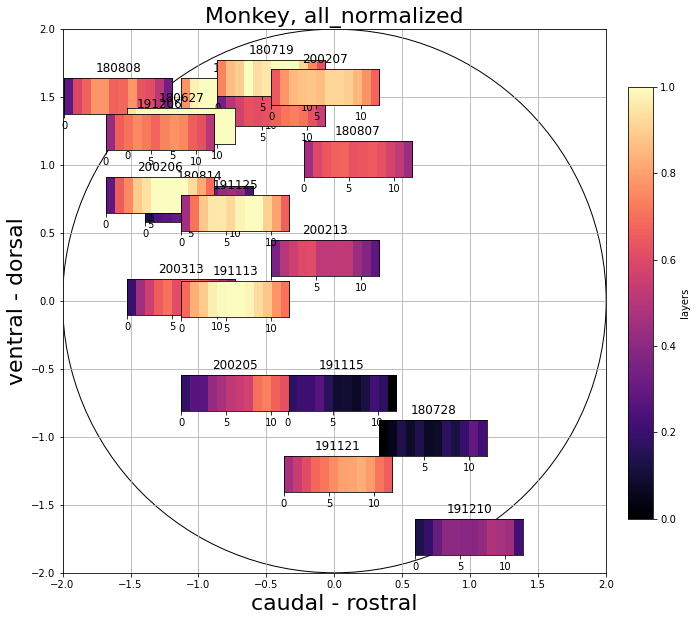

In [30]:
delay = 0
bin_width = 20
select_data = data[(data['delay']==delay) & (data['bin_width']==bin_width)]
discarded_sessions = topographic_bar_plots(select_data,
                                           sessns,
                                           coords,
                                           monkey='all',
                                           cmap='magma',
                                           size=10,
                                           fontsize=22,
                                           separate_color_map=False,
                                          save_file=True,
                                          normalize=True,
                                          capped=False)

<AxesSubplot:xlabel='delay'>

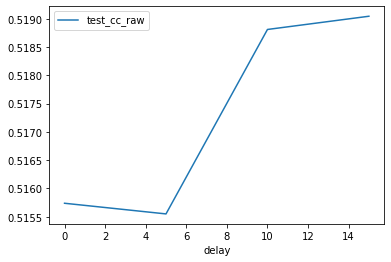

In [71]:
data[(data['session']==200206) & (data['layer']==10) & (data['channel']==32)].plot(x='delay', y='test_cc_raw')

3 were insignificant and hence discarded..!


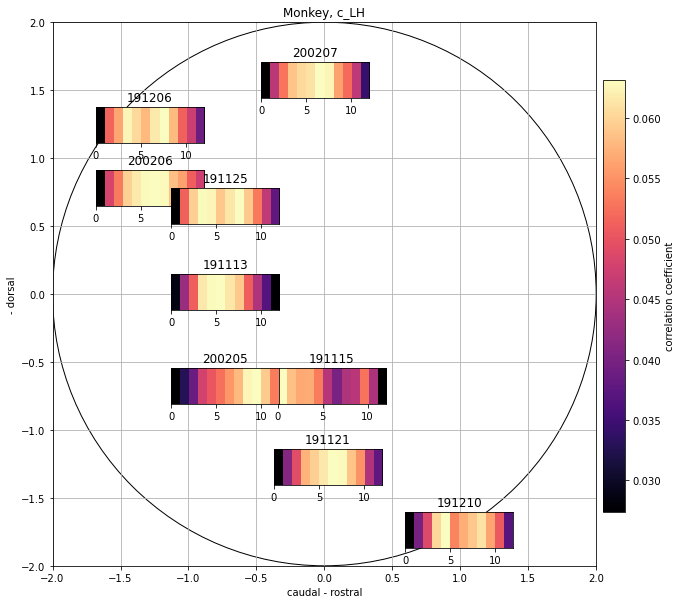

In [72]:
s = 3
norm = False
discarded_sessions = topographic_bar_plots(data,
                                           monkey_sessions[subjects[s]],
                                           monkey_coordinates[subjects[s]],
                                           monkey=subjects[s],
                                           cmap='magma',
                                           size=10,
                                          save_file=True,
                                          normalize=norm,
                                          capped=True)

24 were insignificant and hence discarded..!


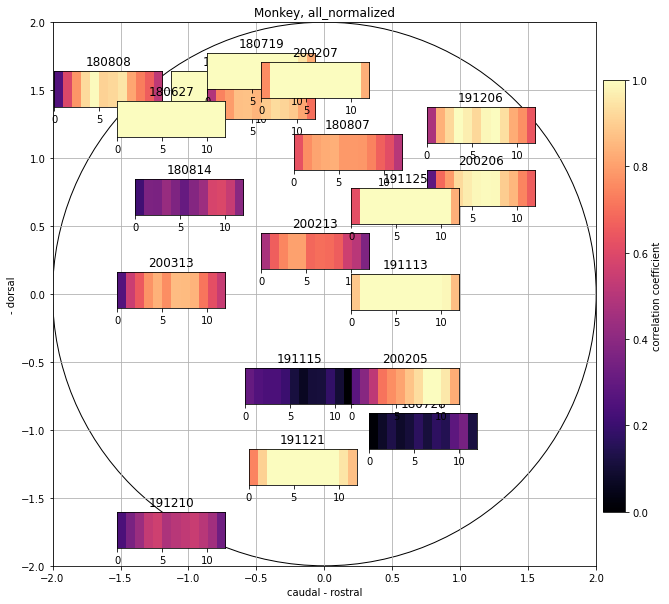

In [18]:
discarded_sessions = topographic_bar_plots(data,
                                           sessns,
                                           coords,
                                           monkey='all',
                                           cmap='magma',
                                           size=10,
                                          save_file=True,
                                          normalize=True,
                                          capped=False)

24 were insignificant and hence discarded..!


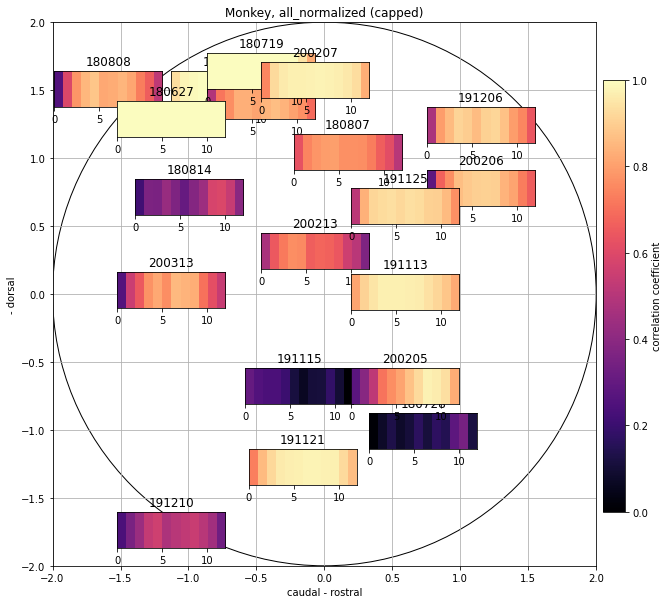

In [20]:
discarded_sessions = topographic_bar_plots(data,
                                           sessns,
                                           coords,
                                           monkey='all',
                                           cmap='magma',
                                           size=10,
                                          save_file=True,
                                          normalize=True,
                                          capped=True)

#### Distribution of 'Normalizers'

array([[<AxesSubplot:title={'center':'normalizer'}>]], dtype=object)

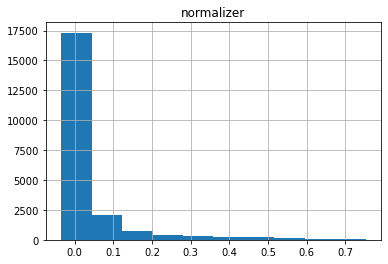

In [28]:
data.hist(column='normalizer')

In [29]:
valid_df = data[(data['normalizer']>0.1)]

array([[<AxesSubplot:title={'center':'normalizer'}>]], dtype=object)

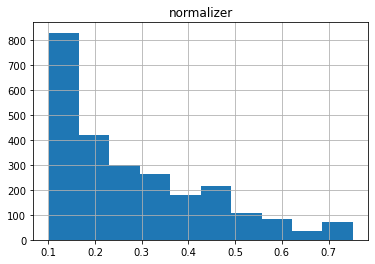

In [30]:
valid_df.hist(column='normalizer')

In [31]:
valid_df.median()

session           191206.000000
layer                  5.500000
channel               21.000000
bin_width             40.000000
delay                  0.000000
train_cc_raw           0.246452
test_cc_raw            0.208294
normalizer             0.231217
normalized_cc          0.826313
norm_capped_cc         0.826313
dtype: float64

In [24]:
data.median()

session           191125.000000
layer                  5.500000
channel               24.000000
bin_width             40.000000
delay                  0.000000
train_cc_raw           0.088116
test_cc_raw            0.009335
normalizer             0.000000
normalized_cc          0.529769
norm_capped_cc         0.529769
dtype: float64

In [35]:
sess = 200206
sess_data = data[(data['session']==sess)]

array([[<AxesSubplot:title={'center':'normalizer'}>]], dtype=object)

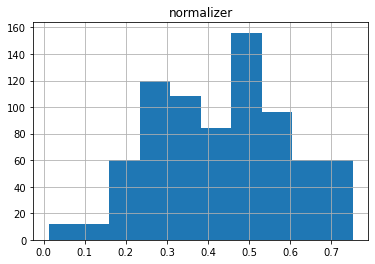

In [38]:
sess_data.hist(column='normalizer')

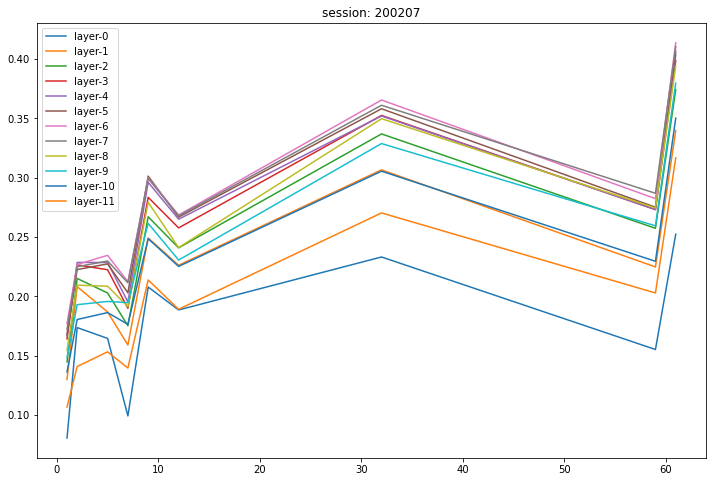

In [190]:
fig, ax = plt.subplots(figsize=(12,8))
layer = 7
sesss = c_LH[np.isin(c_LH, sessions)][0]
valid_df = data[(data['session']==sesss) & (data['normalizer']>0.1)]
valid_df[valid_df['layer']==layer]
for l in valid_df['layer'].unique():
#     valid_df[valid_df['layer']==l].plot(x = 'channel', y='test_cc_raw', ax=ax)
    x = valid_df[valid_df['layer']==l]['channel']
    y = valid_df[valid_df['layer']==l]['test_cc_raw']
    ax.plot(x,y, label=f'layer-{int(l)}')
plt.legend()
plt.title(f'session: {sesss}')
plt.show()

In [247]:
sess = 200207
valid_df = data[(data['session']==sess) & (data['normalizer']>0.1)]

valid_df.groupby('layer', as_index=False).mean()
# valid_df[valid_df['layer'] == 5]

,layer,session,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,normalized_cc
0,0.0,200207.0,20.888889,40.0,0.0,0.232143,0.172803,0.242992,0.746672
1,1.0,200207.0,20.888889,40.0,0.0,0.264301,0.225606,0.242992,0.924886
2,2.0,200207.0,20.888889,40.0,0.0,0.273140,0.246036,0.242992,0.959812
3,3.0,200207.0,20.888889,40.0,0.0,0.290083,0.263172,0.242992,0.970006
4,4.0,200207.0,20.888889,40.0,0.0,0.292323,0.267651,0.242992,0.970997
5,5.0,200207.0,20.888889,40.0,0.0,0.296936,0.269845,0.242992,0.973404
6,6.0,200207.0,20.888889,40.0,0.0,0.301918,0.275650,0.242992,0.977167
7,7.0,200207.0,20.888889,40.0,0.0,0.298928,0.273793,0.242992,0.975185
8,8.0,200207.0,20.888889,40.0,0.0,0.288928,0.255844,0.242992,0.968161
9,9.0,200207.0,20.888889,40.0,0.0,0.273639,0.243531,0.242992,0.954934


In [103]:
data.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368


In [106]:
data.shape

(21492, 8)

In [104]:
data['test_cc_raw']/data['normalizer']

0        2.141444
1        1.322590
2        1.950964
3        1.064028
4        1.954458
           ...   
21487   -0.335093
21488   -1.484170
21489         inf
21490    0.127260
21491   -1.031459
Length: 21492, dtype: float64

In [107]:
data['normalized_cc'] = data['test_cc_raw']/data['normalizer']

In [109]:
data.shape

(21492, 9)

In [154]:
c_LH[np.isin(c_LH, sessions)][0]


200207

In [ ]:
sessions[np.isin(sessions,c_RH, invert=True) & np.isin(sessions,b_RH, invert=True) & 
         np.isin(sessions,f_RH, invert=True) & np.isin(sessions,c_LH, invert=True) ]
c_LH[np.isin(c_LH, sessions)].size
b_RH[np.isin(b_RH, sessions, invert=False)].size
f_RH[np.isin(f_RH, sessions, invert=False)].size
c_RH[np.isin(c_RH,sessions, invert=False)].size

In [ ]:
fig, axes = plt.subplots(figsize=(8,5))
ax = plt.axes([0.80, 0.8, 0.2, 0.05])
# sess = data['session'].unique()[0]
# valid_df = data[(data['session']==sess) & (data['normalizer']>0.1)]
# valid_df.groupby('layer', as_index=False).mean().plot(x='layer', y='test_cc_raw', kind='bar',
#                                 position=0.5, ylim=(0,0.6), width=0.9, ax=ax)
# fig, ax = plt.subplots(figsize=(12,8))
l_scores = valid_df.groupby('layer', as_index=False).mean()['test_cc_raw']
ax.imshow(np.atleast_2d(l_scores), extent=(0,12,0,2), cmap='copper')
ax.set_yticks([])

(0.0, 1.0)

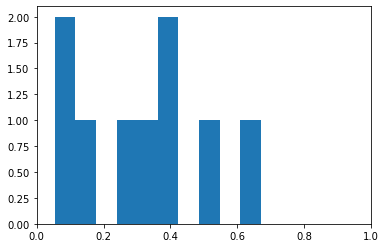

In [139]:
plt.hist(max_scores)
plt.xlim([0,1])

In [109]:
file_name = 'c_w2l_correlations.csv'
file_path = os.path.join(results_dir, file_name)
data = pd.read_csv(file_path)

In [110]:
data['session'].unique()

array([191113., 191125., 180731., 200207., 180720., 180807., 191206.,
       191121., 191210., 200212.])

<AxesSubplot:title={'center':'191206.0'}, xlabel='layer'>

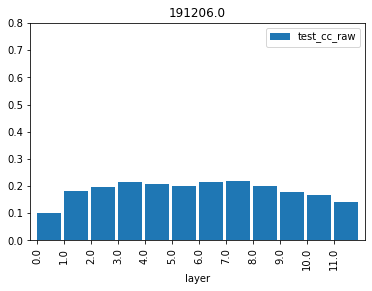

In [111]:
sess = data['session'].unique()[6]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).mean()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,0.8), width=0.9, align='center', title=sess)

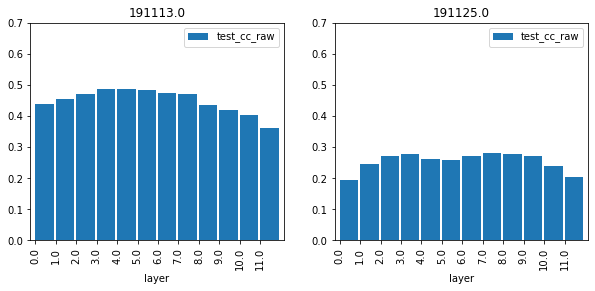

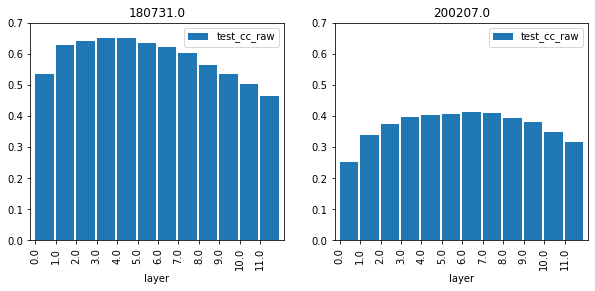

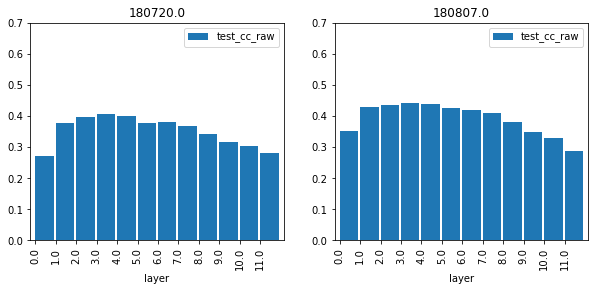

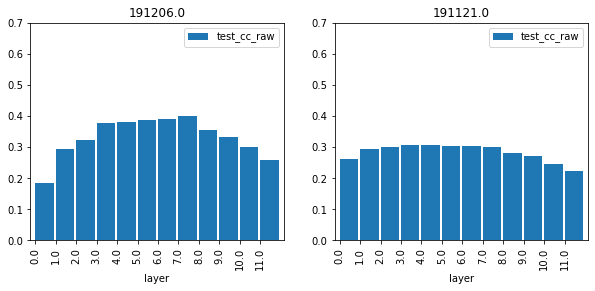

IndexError: index 0 is out of bounds for axis 0 with size 0

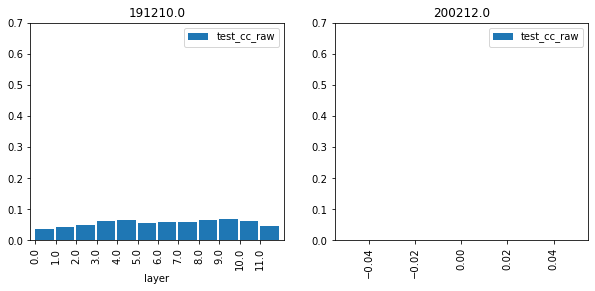

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
lim = 0.7
i=0
j=1

sess = data['session'].unique()[i]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[0])

sess = data['session'].unique()[j]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[1])

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
lim = 0.7
i=2
j=3
sess = data['session'].unique()[i]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[0])

sess = data['session'].unique()[j]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[1])
plt.show()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
lim = 0.7
i=4
j=5
sess = data['session'].unique()[i]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[0])

sess = data['session'].unique()[j]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[1])
plt.show()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
lim = 0.7
i=6
j=7
sess = data['session'].unique()[i]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[0])

sess = data['session'].unique()[j]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[1])
plt.show()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
lim = 0.7
i=8
j=9
sess = data['session'].unique()[i]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[0])

sess = data['session'].unique()[j]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[1])
plt.show()

<AxesSubplot:title={'center':'180731.0'}, xlabel='layer'>

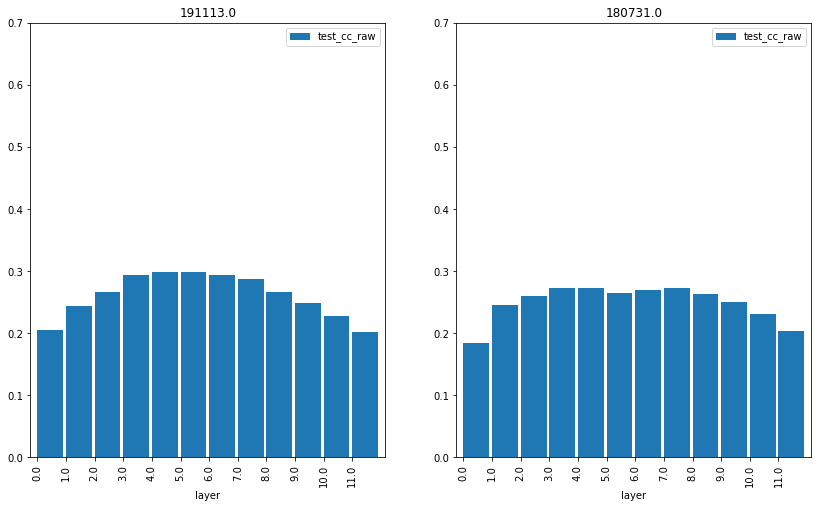

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
lim = 0.7
sess = data['session'].unique()[0]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).mean()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[0])

sess = data['session'].unique()[2]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).mean()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[1])

<AxesSubplot:title={'center':'180731.0'}, xlabel='layer'>

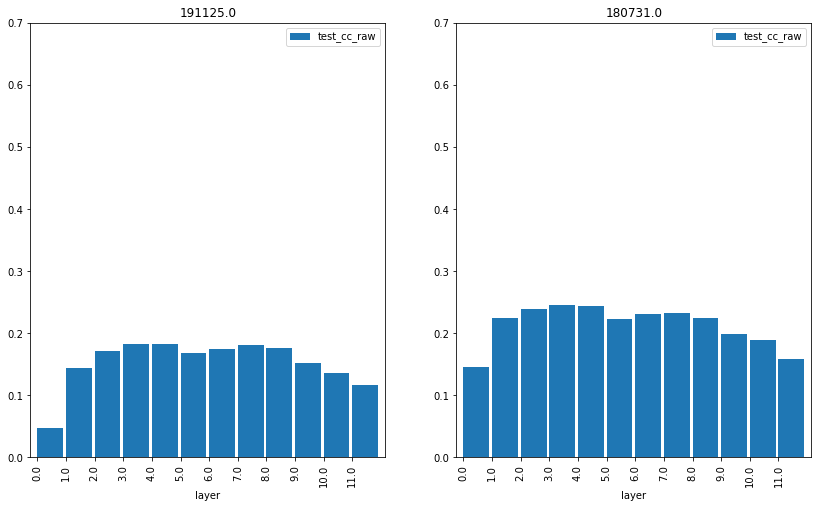

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
lim = 0.7
sess = data['session'].unique()[1]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).median()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[0])
sess = data['session'].unique()[2]
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).median()\
    .plot(x='layer', y='test_cc_raw', kind='bar', position=0, ylim=(0,lim), width=0.9, align='center', title=sess, ax=ax[1])

In [86]:
data[(data['session']==sess) & (data['normalizer']>0.1)].groupby(['layer'], as_index=False).max()

,layer,session,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer
0,0.0,191125.0,56.0,40.0,0.0,0.220665,0.193177,0.211279
1,1.0,191125.0,56.0,40.0,0.0,0.295295,0.245973,0.211279
2,2.0,191125.0,56.0,40.0,0.0,0.300229,0.272357,0.211279
3,3.0,191125.0,56.0,40.0,0.0,0.310384,0.278951,0.211279
4,4.0,191125.0,56.0,40.0,0.0,0.298634,0.262822,0.211279
5,5.0,191125.0,56.0,40.0,0.0,0.289890,0.258285,0.211279
6,6.0,191125.0,56.0,40.0,0.0,0.302425,0.270762,0.211279
7,7.0,191125.0,56.0,40.0,0.0,0.313644,0.282216,0.211279
8,8.0,191125.0,56.0,40.0,0.0,0.308975,0.279384,0.211279
9,9.0,191125.0,56.0,40.0,0.0,0.297200,0.270448,0.211279


In [27]:
a = np.random.randn(12,250,64)

In [28]:
b = np.random.randn(12, 70, 250)

In [10]:
c = utils.predict(b, a)

NameError: name 'utils' is not defined

In [29]:
(b@a).shape

(12, 70, 64)

In [24]:
a = np.random.randn(10,20,5)
b = np.random.randn(10,5, 15)

In [25]:
(a@b).shape

(10, 20, 15)